# Data Analysis

In [1]:
# импортируем библиотеки
import re
import collections

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

Populating the interactive namespace from numpy and matplotlib


In [73]:
# загружаем данные
df = pd.read_json('vacs.json')

In [75]:
# удаляем лишнюю информацию
labels = ['address', 'accept_handicapped', 'accept_kids', 'allow_messages', 'apply_alternate_url', 'key_skills', \
         'archived', 'branded_description', 'billing_type', 'code', 'contacts', 'department', 'employment', \
         'hidden', 'id', 'negotiations_url', 'premium', 'quick_responses_allowed', 'relations', \
         'response_letter_required', 'response_url', 'site', 'suitable_resumes_url', 'test', 'type']
df_corr = df.drop(labels, 1)
df_corr.head()

alternate_url  \
0  https://hh.ru/vacancy/22616394   
1  https://hh.ru/vacancy/22817878   
2  https://hh.ru/vacancy/21934446   
3  https://hh.ru/vacancy/22824377   
4  https://hh.ru/vacancy/22227252   

                                                area          created_at  \
0  {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-26 08:01:24   
1  {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-21 08:23:32   
2  {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-20 06:40:07   
3  {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-21 12:49:13   
4  {'url': 'https://api.hh.ru/areas/115', 'id': '... 2017-09-24 13:00:49   

                                         description  \
0  <p>Naumen является одной из крупнейших российс...   
1  <p><em><strong>Наш партнер - крупнейшая интерн...   
2  <p><strong>Обязанности:</strong></p> <ul> <li>...   
3  <p>В компанию “ОВЕН” (крупнейшая российская ко...   
4  <p>Лидер украинского рынка инженерной сантехни...   

                                            employer  \
0  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
1  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
2  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
3  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
4  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   

                                          experience  \
0    {'id': 'between3And6', 'name': 'От 3 до 6 лет'}   
1  {'id': 'between1And3', 'name': 'От 1 года до 3...   
2  {'id': 'between1And3', 'name': 'От 1 года до 3...   
3  {'id': 'between1And3', 'name': 'От 1 года до 3...   
4    {'id': 'between3And6', 'name': 'От 3 до 6 лет'}   

                                                name        published_at  \
0  Менеджер по развитию продукта для решения "Инт... 2017-09-26 08:01:24   
1                  Продукт-менеджер (бренд-менеджер) 2017-09-21 08:23:32   
2                                   Продакт-менеджер 2017-09-20 06:40:07   
3             Менеджер по продукту (облачный сервис) 2017-09-21 12:49:13   
4                               Менеджер по продукту 2017-09-24 13:00:49   

                                              salary  \
0                                               None   
1  {'to': 200000, 'gross': False, 'from': None, '...   
2                                               None   
3  {'to': 75000, 'gross': False, 'from': 75000, '...   
4                                               None   

                                   schedule  \
0  {'id': 'fullDay', 'name': 'Полный день'}   
1  {'id': 'fullDay', 'name': 'Полный день'}   
2  {'id': 'fullDay', 'name': 'Полный день'}   
3  {'id': 'fullDay', 'name': 'Полный день'}   
4  {'id': 'fullDay', 'name': 'Полный день'}   

                                     specializations  
0  [{'profarea_id': '17', 'profarea_name': 'Прода...  
1  [{'profarea_id': '3', 'profarea_name': 'Маркет...  
2  [{'profarea_id': '3', 'profarea_name': 'Маркет...  
3  [{'profarea_id': '1', 'profarea_name': 'Информ...  
4  [{'profarea_id': '17', 'profarea_name': 'Прода...

In [5]:
# столбец salary заполнен на треть
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 12 columns):
alternate_url      680 non-null object
area               680 non-null object
created_at         680 non-null datetime64[ns]
description        680 non-null object
employer           680 non-null object
experience         680 non-null object
key_skills         680 non-null object
name               680 non-null object
published_at       680 non-null datetime64[ns]
salary             215 non-null object
schedule           680 non-null object
specializations    680 non-null object
dtypes: datetime64[ns](2), object(10)
memory usage: 69.1+ KB


In [6]:
# в некоторых столбцах данные представлены в виде словаря
experience = df_corr.experience[0]
experience

{'id': 'between3And6', 'name': 'От 3 до 6 лет'}

In [7]:
# определим ключ, значения по которому нам потребуются
experience = df_corr.experience[0]['name']
experience

'От 3 до 6 лет'

In [8]:
# сохраним значения по искомому ключу в отдельный столбец
df_corr['exp_name'] = df_corr['experience'].apply(lambda x: x['name'])

In [48]:
# посмотрим на полученные значения
df_corr['exp_name'].value_counts()

От 1 года до 3 лет    314
От 3 до 6 лет         296
Нет опыта              39
Более 6 лет            31
Name: exp_name, dtype: int64

In [77]:
df_corr['emp_name'] = df_corr['employer'].apply(lambda x: x['name'])

In [86]:
df_corr[(df_corr['emp_name'] == 'Курский электроаппаратный завод')]

alternate_url  \
5    https://hh.ru/vacancy/22557578   
36   https://hh.ru/vacancy/22598352   
119  https://hh.ru/vacancy/22604243   
279  https://hh.ru/vacancy/22604318   
434  https://hh.ru/vacancy/22607406   
472  https://hh.ru/vacancy/22604289   
614  https://hh.ru/vacancy/22604256   

                                                  area          created_at  \
5    {'url': 'https://api.hh.ru/areas/56', 'id': '5... 2017-08-31 05:32:13   
36   {'url': 'https://api.hh.ru/areas/56', 'id': '5... 2017-09-04 11:12:46   
119  {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-04 14:42:53   
279  {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-04 14:46:46   
434  {'url': 'https://api.hh.ru/areas/26', 'id': '2... 2017-09-05 05:24:15   
472  {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-04 14:45:12   
614  {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-04 14:43:41   

                                           description  \
5    <strong>Обязанности:</strong> <ul> <li>Маркети...   
36   <strong>Обязанности:</strong> <ul> <li>Маркети...   
119  <p>Руководитель направления/Продукт-менеджер (...   
279  <p><strong>КЭАЗ - Компания-производитель элект...   
434  <strong>Обязанности:</strong> <ul> <li>Маркети...   
472  <p>Руководитель направления/Продукт-менеджер (...   
614  <p><strong>КЭАЗ - Компания-производитель элект...   

                                              employer  \
5    {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
36   {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
119  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
279  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
434  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
472  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   
614  {'logo_urls': {'90': 'https://hhcdn.ru/employe...   

                                            experience  \
5    {'id': 'between1And3', 'name': 'От 1 года до 3...   
36   {'id': 'between1And3', 'name': 'От 1 года до 3...   
119  {'id': 'between1And3', 'name': 'От 1 года до 3...   
279  {'id': 'between1And3', 'name': 'От 1 года до 3...   
434  {'id': 'between1And3', 'name': 'От 1 года до 3...   
472  {'id': 'between1And3', 'name': 'От 1 года до 3...   
614  {'id': 'between1And3', 'name': 'От 1 года до 3...   

                                                  name        published_at  \
5         Менеджер по продукту (автоматизация, АСУ ТП) 2017-08-31 05:32:13   
36                                    Продукт-менеджер 2017-09-04 11:12:46   
119  Руководитель направления/Продукт-менеджер (авт... 2017-09-04 14:42:53   
279  Руководитель направления/Продукт-менеджер (мон... 2017-09-04 14:46:46   
434                        Продукт-менеджер (г. Курск) 2017-09-05 05:24:15   
472  Руководитель направления/Продукт-менеджер (сре... 2017-09-04 14:45:12   
614  Руководитель направления/Продукт-менеджер (нап... 2017-09-04 14:43:41   

                                                salary  \
5                                                 None   
36                                                None   
119  {'to': 200000, 'gross': False, 'from': 120000,...   
279  {'to': 200000, 'gross': False, 'from': 120000,...   
434                                               None   
472  {'to': 200000, 'gross': False, 'from': 120000,...   
614  {'to': 200000, 'gross': False, 'from': 120000,...   

                                     schedule  \
5    {'id': 'fullDay', 'name': 'Полный день'}   
36   {'id': 'fullDay', 'name': 'Полный день'}   
119  {'id': 'fullDay', 'name': 'Полный день'}   
279  {'id': 'fullDay', 'name': 'Полный день'}   
434  {'id': 'fullDay', 'name': 'Полный день'}   
472  {'id': 'fullDay', 'name': 'Полный день'}   
614  {'id': 'fullDay', 'name': 'Полный день'}   

                                       specializations  \
5    [{'profarea_id': '17', 'profarea_name': 'Прода...   
36   [{'profarea_id': '17', 'profarea_name': 'Прода...   
119  [{'profarea_id': '17', 'pro

In [78]:
df_corr['emp_name'].value_counts()

МТС                                            10
Передовые мебельные технологии                 10
Tele2                                           7
SOLOPHARM                                       7
Курский электроаппаратный завод                 7
Ростелеком                                      7
HAYS                                            6
Profit Center FX                                5
Acronis                                         5
Группа компаний IEK                             5
Федеральный институт повышения квалификации     5
QTECH                                           5
Kelly Services                                  4
Билайн                                          4
MICS Distribution Company                       4
Abbott Laboratories                             4
Avito                                           4
СМАРТ                                           3
LEOMAX Group                                    3
MUK                                             3


## Отфильтруем сферы бизнеса

In [83]:
# создадим отдельный столбец со сферой бизнеса
df_corr['spec_area'] = df_corr['specializations'].apply(lambda x: x[0]['profarea_name'])

In [84]:
# посмотрим на значения в этом столбце
df_corr['spec_area'].value_counts()

Маркетинг, реклама, PR                                   282
Информационные технологии, интернет, телеком             157
Продажи                                                  131
Закупки                                                   25
Производство                                              18
Искусство, развлечения, масс-медиа                        10
Консультирование                                           9
Медицина, фармацевтика                                     9
Автомобильный бизнес                                       9
Строительство, недвижимость                                8
Банки, инвестиции, лизинг                                  5
Инсталляция и сервис                                       4
Высший менеджмент                                          3
Начало карьеры, студенты                                   3
Наука, образование                                         1
Туризм, гостиницы, рестораны                               1
Бухгалтерия, управленчес

In [61]:
df_corr['specializations'][0]

[{'id': '17.333',
  'name': 'Услуги для бизнеса',
  'profarea_id': '17',
  'profarea_name': 'Продажи'},
 {'id': '17.324',
  'name': 'Управление продажами',
  'profarea_id': '17',
  'profarea_name': 'Продажи'},
 {'id': '1.113',
  'name': 'Консалтинг, Аутсорсинг',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'},
 {'id': '1.225',
  'name': 'Продажи',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'},
 {'id': '1.246',
  'name': 'Развитие бизнеса',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'},
 {'id': '1.137',
  'name': 'Маркетинг',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'}]

In [12]:
# посмотрим на названия вакансий
df_corr['name'].value_counts()

Продакт-менеджер                                                                     64
Менеджер по продукту                                                                 55
Product manager                                                                      31
Product Manager                                                                      22
Product Marketing Manager                                                             7
Продукт-менеджер                                                                      5
Маркетинг продакт-менеджер                                                            5
Менеджер продукта                                                                     4
Продукт - менеджер                                                                    4
Менеджер по продажам программных продуктов                                            3
Product Manager (Менеджер продукта)                                                   3
Менеджер по продукту / Product m

## Подготовим срезы по городам

In [15]:
df_corr['city'] = df_corr['area'].apply(lambda x: x['name'])

In [16]:
df_corr['city'].value_counts()

Москва                               398
Санкт-Петербург                       76
Киев                                  27
Минск                                 21
Алматы                                13
Новосибирск                           13
Нижний Новгород                       10
Екатеринбург                          10
Воронеж                                7
Краснодар                              7
Челябинск                              6
Пермь                                  6
Харьков                                4
Томск                                  4
Самара                                 3
Ростов-на-Дону                         3
Барнаул                                3
Саратов                                3
Одесса                                 3
Владимир                               3
Китай                                  3
Днепр (Днепропетровск)                 2
Уфа                                    2
Зеленоград                             2
Сочи            

In [36]:
# создадим новый датафрейм с данными по Москве
df_msc = df_corr[(df_corr['city'] == 'Москва')]

In [38]:
# создадим новый датафрейм с данными по Петебургу
df_spb = df_corr[(df_corr['city'] == 'Санкт-Петербург')]

## Частотный список

In [42]:
# возьмем одну вакансию для примера
df_corr['name'][2]

'Продакт-менеджер'

In [43]:
# посмотрим на ее описание
df_corr['description'][2]

'<p><strong>Обязанности:</strong></p> <ul> <li>Анализ рынка и конкурентной среды</li> <li>Бренд-планирование, разработка и реализация маркетинговой стратегии по продуктам, входящим в зону ответственности</li> <li>Формирование и исполнение бюджета маркетинговых затрат</li> <li>Организация лончевых мероприятий для врачей и первостольников</li> <li>Подготовка рекламных материалов и публикаций в прессе и интернете</li> <li>Работа с агентствами, включая разработку креативных концепций и планирование размещения рекламы</li> <li>Разработка и внедрение творческих идей и инновационных подходов к продвижению</li> <li>Подготовка обучающих программ и полевой стратегии продвижения для медицинских представителей</li> </ul> <p> </p> <p><strong>Требования:</strong></p> <ul> <li><em><strong>Готовность к переезду в г. Санкт-Петербург</strong></em></li> <li>Высшее медицинское, фармацевтическое, экономическое образование в сочетании с образованием в сфере маркетинга будет вашим преимуществом</li> <li>Опыт

In [19]:
# функция должна возвращать пары (слово, частота), отсортированные по частоте в порядке убывания
def get_freq_list(texts):
    words = collections.defaultdict(int)
    for text in texts:
        for word in re.split(r'\W', text):
            words[word.lower()] += 1
    del words[u'']
    
    return [(word, words[word]) for word in sorted(words, key=lambda w: words[w], reverse=True)]

In [21]:
get_freq_list(df_corr.description)

[('li', 26600),
 ('p', 11418),
 ('strong', 6398),
 ('и', 6261),
 ('ul', 4470),
 ('в', 4121),
 ('с', 2189),
 ('по', 1991),
 ('на', 1865),
 ('and', 1378),
 ('работы', 1263),
 ('опыт', 1255),
 ('для', 992),
 ('продуктов', 761),
 ('компании', 760),
 ('от', 698),
 ('to', 632),
 ('продукта', 619),
 ('мы', 618),
 ('the', 615),
 ('анализ', 609),
 ('of', 559),
 ('продаж', 549),
 ('рынка', 542),
 ('разработка', 538),
 ('br', 535),
 ('product', 529),
 ('требования', 528),
 ('знание', 527),
 ('em', 504),
 ('quot', 489),
 ('условия', 457),
 ('обязанности', 446),
 ('in', 444),
 ('образование', 436),
 ('новых', 408),
 ('работа', 406),
 ('участие', 384),
 ('к', 383),
 ('умение', 383),
 ('высшее', 376),
 ('контроль', 361),
 ('00', 348),
 ('не', 341),
 ('with', 336),
 ('2', 332),
 ('лет', 330),
 ('a', 329),
 ('навыки', 321),
 ('или', 320),
 ('продукции', 320),
 ('развития', 309),
 ('до', 305),
 ('for', 299),
 ('рф', 298),
 ('подготовка', 296),
 ('управление', 289),
 ('тк', 283),
 ('офис', 268),
 ('marke

In [53]:
get_freq_list(df_corr.key_skills)

SyntaxError: unexpected EOF while parsing (<ipython-input-53-cf2fd877e8a0>, line 1)

## Bag of Words

In [26]:
vect = CountVectorizer(ngram_range=(1,2), max_df=0.5)

In [27]:
bag = vect.fit_transform(df_corr['description'])

In [28]:
vect.vocabulary_

{'naumen': 13226,
 'является': 87742,
 'одной': 52548,
 'из': 36111,
 'крупнейших': 43501,
 'российских': 71940,
 'компаний': 41207,
 'сфере': 79061,
 'разработки': 69574,
 'внедрения': 27040,
 'it': 9319,
 'решений': 71456,
 'наша': 49602,
 'миссия': 46872,
 'решать': 71412,
 'истинные': 38181,
 'задачи': 34336,
 'бизнеса': 24318,
 'поэтому': 61332,
 'продуктовый': 65346,
 'портфель': 60486,
 'постоянно': 60918,
 'растет': 70177,
 'развивается': 68608,
 'ежедневно': 33407,
 'наши': 49683,
 'решения': 71539,
 'используют': 38048,
 'более': 24541,
 '1000': 166,
 'свыше': 73728,
 '12': 183,
 'миллионов': 46709,
 'пользователей': 59921,
 'всему': 28077,
 'миру': 46852,
 'за': 33948,
 '15': 221,
 'лет': 43857,
 'мы': 47728,
 'выросли': 28826,
 'десятки': 30911,
 'раз': 68536,
 'числу': 86407,
 'сотрудников': 76819,
 'объему': 52257,
 'выручки': 28842,
 'открыли': 54986,
 'офисов': 55629,
 'россии': 71839,
 'рубежом': 72142,
 'получили': 59888,
 'признание': 62824,
 'покорили': 59478,
 'топ

In [29]:
vect.stop_words_

{'li',
 'li li',
 'li ul',
 'li опыт',
 'strong',
 'strong ul',
 'strong обязанности',
 'strong требования',
 'strong условия',
 'ul',
 'ul li',
 'ul strong',
 'высшее',
 'для',
 'компании',
 'на',
 'образование',
 'обязанности',
 'обязанности strong',
 'опыт',
 'опыт работы',
 'от',
 'по',
 'работы',
 'требования',
 'требования strong',
 'условия',
 'условия strong'}

In [30]:
vctr_tfidf = TfidfTransformer()

In [31]:
td_bag = vctr_tfidf.fit_transform(bag)

In [32]:
vctr_tfidf.idf_

array([ 2.40556849,  6.42495002,  6.42495002, ...,  6.83041513,
        6.83041513,  6.83041513])

## NTLK

In [33]:
# отфильтруем вакансии на английском
name = ['Product manager']
df_eng = df_corr[df_corr['name'].str.contains('|'.join(name), flags=re.IGNORECASE)]
df_eng

alternate_url  \
7    https://hh.ru/vacancy/20449068   
8    https://hh.ru/vacancy/22656600   
16   https://hh.ru/vacancy/22475165   
20   https://hh.ru/vacancy/22584754   
21   https://hh.ru/vacancy/20744207   
26   https://hh.ru/vacancy/22764306   
27   https://hh.ru/vacancy/21504153   
34   https://hh.ru/vacancy/22766948   
38   https://hh.ru/vacancy/22033449   
40   https://hh.ru/vacancy/22647586   
44   https://hh.ru/vacancy/20497099   
45   https://hh.ru/vacancy/22300962   
46   https://hh.ru/vacancy/22309355   
47   https://hh.ru/vacancy/21799913   
51   https://hh.ru/vacancy/22863619   
56   https://hh.ru/vacancy/20752561   
57   https://hh.ru/vacancy/22164884   
63   https://hh.ru/vacancy/22058320   
70   https://hh.ru/vacancy/22156556   
71   https://hh.ru/vacancy/22722763   
78   https://hh.ru/vacancy/22711530   
79   https://hh.ru/vacancy/22749685   
81   https://hh.ru/vacancy/22452877   
83   https://hh.ru/vacancy/22656776   
86   https://hh.ru/vacancy/21919791   
87   https://hh.ru/vacancy/22662845   
90   https://hh.ru/vacancy/22831539   
93   https://hh.ru/vacancy/22583222   
94   https://hh.ru/vacancy/22577927   
96   https://hh.ru/vacancy/22841204   
..                              ...   
538  https://hh.ru/vacancy/21957655   
542  https://hh.ru/vacancy/22514273   
544  https://hh.ru/vacancy/22438724   
545  https://hh.ru/vacancy/22859327   
546  https://hh.ru/vacancy/22789637   
549  https://hh.ru/vacancy/22546322   
554  https://hh.ru/vacancy/22295172   
558  https://hh.ru/vacancy/22639007   
560  https://hh.ru/vacancy/21703324   
561  https://hh.ru/vacancy/22750907   
580  https://hh.ru/vacancy/22716117   
581  https://hh.ru/vacancy/22539105   
582  https://hh.ru/vacancy/22739582   
591  https://hh.ru/vacancy/22577937   
599  https://hh.ru/vacancy/22824836   
601  https://hh.ru/vacancy/22449428   
611  https://hh.ru/vacancy/22603358   
616  https://hh.ru/vacancy/22840976   
617  https://hh.ru/vacancy/22834179   
621  https://hh.ru/vacancy/20431323   
630  https://hh.ru/vacancy/22775937   
636  https://hh.ru/vacancy/22402705   
639  https://hh.ru/vacancy/22722277   
647  https://hh.ru/vacancy/21122971   
653  https://hh.ru/vacancy/19856949   
659  https://hh.ru/vacancy/22214992   
666  https://hh.ru/vacancy/22536300   
667  https://hh.ru/vacancy/22608219   
668  https://hh.ru/vacancy/22822300   
675  https://hh.ru/vacancy/22861449   

                                                  area          created_at  \
7    {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-18 06:33:42   
8    {'url': 'https://api.hh.ru/areas/115', 'id': '... 2017-09-07 18:48:51   
16   {'url': 'https://api.hh.ru/areas/53', 'id': '5... 2017-09-19 05:43:40   
20   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-22 09:25:03   
21   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-22 08:56:06   
26   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-25 07:35:20   
27   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-25 09:14:53   
34   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-24 08:52:59   
38   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-11 10:23:45   
40   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-25 08:49:23   
44   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-11 07:31:03   
45   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-19 10:32:00   
46   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-25 08:31:36   
47   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-11 23:26:11   
51   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-25 16:21:16   
56   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-20 07:23:18   
57   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-09-25 14:26:52   
63   {'url': 'https://api.hh.ru/areas/1', 'id': '1'... 2017-08-28 08:57:26   
70   {'url': 'https://api.hh.ru/areas/2', 'id': '2'... 2017-09-23 10:46:52   
71   {'url': 'https://api.hh.ru/areas/127',

In [34]:
def get_popular_phrase(text, len, count_phrases):
    phrase_counter = Counter()
    words = nltk.word_tokenize(text.lower())

    for phrase in nltk.ngrams(words, len):
        if all(word not in string.punctuation for word in phrase):
            phrase_counter[phrase] += 1

    return phrase_counter.most_common(count_phrases)

    descriptions = df_corr['description']

    text = ''

    for description in descriptions:
            text = text + description[0]

    result = get_popular_phrase(text, 1, 20)
    for r in result:
        print(" ".join(r[0]) + " - " + str(r[1]))

In [35]:
def main():
    descriprions = df_corr['description']

    text = ''

    for descriprion in descriprions:
            text = text + descriprion[0]

    result = get_popular_phrase(text, 4, 20)
    for r in result:
        print(" ".join(r[0]) + " - " + str(r[1]))

main()

< < < < - 649
< < < о - 2
< < о < - 2
< о < < - 2
о < < < - 2
< < < к - 2
< < к < - 2
< к < < - 2
к < < < - 2
< < < в - 1
< < в < - 1
< в < < - 1
в < < < - 1
< < < м - 1
< < м < - 1
< м < < - 1
м < < < - 1
< < < н - 1
< < н < - 1
< н < < - 1


## Проанализируем зарплаты

In [44]:
df_sal = df_corr.dropna(axis=0)

In [45]:
df_corr.salary[0]

In [69]:
df_sal['sal_from'] = df_sal['salary'].apply(lambda x: x['from'])

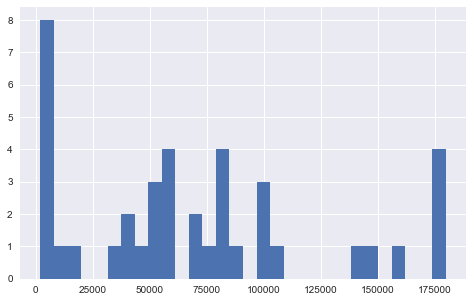

In [70]:
ax = df_sal['sal_from'].hist(bins=30)

In [71]:
df_sal['sal_from'].value_counts()

60000     4
80000     4
50000     3
100000    3
180000    3
5000      3
40000     2
70000     2
3300      2
45000     1
90000     1
2000      1
3760      1
175000    1
140000    1
4000      1
35000     1
15000     1
160000    1
105000    1
8000      1
150000    1
75000     1
Name: sal_from, dtype: int64